<a href="https://colab.research.google.com/github/k-ryota630/k-ryota630/blob/main/olkan_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq
!apt-get install -y fonts-ipafont-gothic

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (31.6 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 124926 files and directories currently

In [2]:
plt.rcParams["font.family"] = "IPAPGothic"
plt.rcParams["axes.unicode_minus"] = False  # 負の符号が正しく表示されるように

NameError: name 'plt' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

----- シミュレーション結果 -----
最終金額：44,846,480円
期待利回り (IRR)：5.05%
年間リターン:
[0.07383838 0.03721803 0.06312679 0.01841094 0.06183321 0.04972776
 0.08429917 0.03053163 0.04112001 0.05146785 0.03842061 0.02920796
 0.06899738 0.02986639 0.06620988 0.00378376 0.05560412 0.04184144
 0.0433666  0.05376752 0.04252891 0.02008476 0.0770585  0.04953603
 0.06598691 0.05604415 0.0839831  0.04917202 0.05715442 0.04095169
 0.05267891 0.06431643 0.05860086 0.06331416 0.01812032 0.03763453
 0.05509347 0.02384393 0.04365918 0.06736383 0.05847902 0.04388604
 0.07514988 0.02443672 0.0635672  0.04144684 0.04434431 0.05142575
 0.06240954 0.07471973]


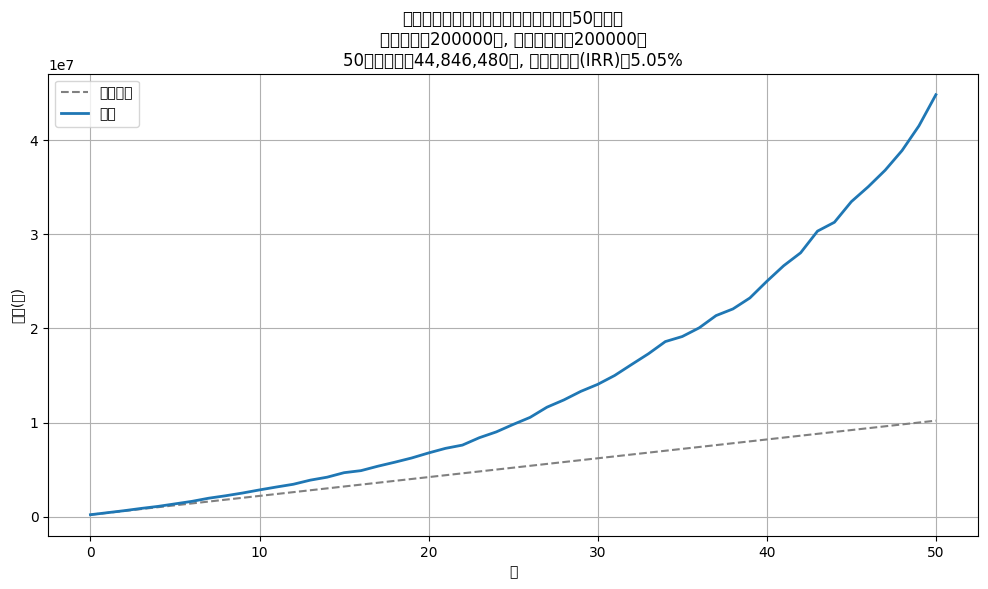

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォントの設定（Colab用にIPAPGothicを指定）
plt.rcParams["font.family"] = "IPAPGothic"
plt.rcParams["axes.unicode_minus"] = False  # 負の符号が正しく表示されるようにする

def simulate_orkan(initial_investment, annual_contribution, years):
    # 平均年利回り5%、標準偏差2%の正規分布からランダムな年利回りを生成
    annual_returns = np.random.normal(0.05, 0.02, years)
    investment_values = np.zeros(years + 1)
    investment_values[0] = initial_investment
    for year in range(1, years + 1):
        investment_values[year] = investment_values[year - 1] * (1 + annual_returns[year - 1]) + annual_contribution
    return investment_values, annual_returns

def npv(rate, cash_flows):
    """与えられた金利(rate)での正味現在価値(NPV)を計算"""
    total = 0
    for t, cf in enumerate(cash_flows):
        total += cf / ((1 + rate) ** t)
    return total

def compute_irr(cash_flows, tol=1e-6, max_iter=1000):
    """二分探索法でIRR（内部収益率）を計算"""
    low, high = -0.99, 1.0  # 探索範囲
    for i in range(max_iter):
        mid = (low + high) / 2
        npv_mid = npv(mid, cash_flows)
        if abs(npv_mid) < tol:
            return mid
        if npv_mid > 0:
            low = mid
        else:
            high = mid
    return mid

# 初期パラメータ
initial_investment = 200000   # 初期投資金額
annual_contribution = 200000  # 毎年の積立額
years = 50

# シミュレーション実行
investment_values, annual_returns = simulate_orkan(initial_investment, annual_contribution, years)
final_amount = investment_values[-1]

# キャッシュフローの定義
# t=0: -初期投資
# t=1～t=years-1: -毎年の積立額
# t=years: -毎年の積立額 + シミュレーション最終値（最終年の積立も含む）
cash_flows = [-initial_investment] + [-annual_contribution] * (years - 1) + [-annual_contribution + final_amount]
irr = compute_irr(cash_flows)

# 累計の積立額（元本）の推移を計算
contributions = np.array([initial_investment + annual_contribution * i for i in range(years + 1)])

# 結果の表示（数値情報の追加）
print("----- シミュレーション結果 -----")
print(f"最終金額：{final_amount:,.0f}円")
print(f"期待利回り (IRR)：{irr*100:.2f}%")
print("年間リターン:")
print(annual_returns)

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(range(years + 1), contributions, label='積立金額', linestyle='--', color='gray')
plt.plot(range(years + 1), investment_values, label='総額', linewidth=2)

plt.title(
    f"オルカン積立投資シミュレーション（{years}年間）\n"
    f"初期投資：{initial_investment}円, 毎年の積立：{annual_contribution}円\n"
    f"50年後予想：{final_amount:,.0f}円, 期待利回り(IRR)：{irr*100:.2f}%"
)
plt.xlabel('年')
plt.ylabel('金額(円)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
!apt-get install -qq fonts-noto-cjk

Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 124945 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
plt.rcParams["font.family"] = "Noto Sans CJK JP"
plt.rcParams["axes.unicode_minus"] = False  # 負の符号が正しく表示されるように

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

----- シミュレーション結果 -----
最終金額：44,365,921円
期待利回り (IRR)：5.01%
年間リターン:
[ 0.02559188  0.04133341  0.10975442  0.04450375  0.04987795 -0.00068759
  0.04721007  0.06323985  0.01740104  0.01012672  0.06764009  0.05265194
  0.06221345  0.04290914  0.01800469  0.05609422  0.04254705  0.0525595
  0.06386032  0.02003161  0.03900115  0.05662376  0.05730384  0.07384358
  0.03798055  0.04312142  0.02028407  0.05631519  0.0268618   0.0598036
  0.03491455  0.0724427   0.04999573  0.05263608  0.03868132  0.04758738
  0.0552679   0.04258205  0.06982485  0.05933154  0.05809915  0.07661585
  0.04213227  0.08457432  0.05656368  0.05833016  0.03689162  0.06469996
  0.03959981  0.04670053]


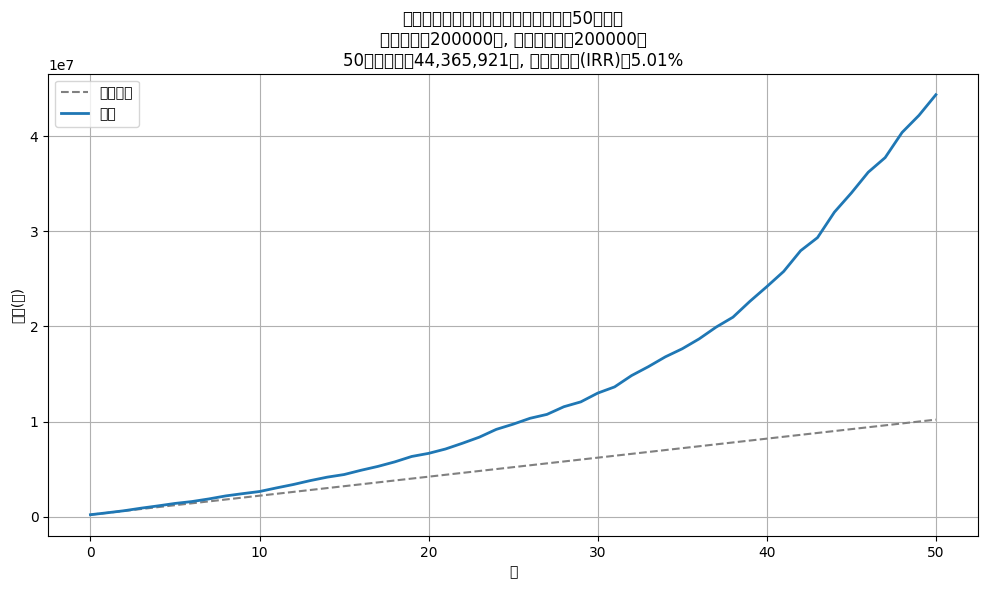

In [1]:
# 日本語フォントのインストール（最初のセルで実行）
!apt-get install -qq fonts-noto-cjk

import matplotlib.pyplot as plt
import numpy as np

# 日本語フォントの設定（Colab用にNoto Sans CJK JPを指定）
plt.rcParams["font.family"] = "Noto Sans CJK JP"
plt.rcParams["axes.unicode_minus"] = False  # 負の符号が正しく表示されるようにする

def simulate_orkan(initial_investment, annual_contribution, years):
    # 平均年利回り5%、標準偏差2%の正規分布からランダムな年利回りを生成
    annual_returns = np.random.normal(0.05, 0.02, years)
    investment_values = np.zeros(years + 1)
    investment_values[0] = initial_investment
    for year in range(1, years + 1):
        investment_values[year] = investment_values[year - 1] * (1 + annual_returns[year - 1]) + annual_contribution
    return investment_values, annual_returns

def npv(rate, cash_flows):
    """与えられた金利(rate)での正味現在価値(NPV)を計算"""
    total = 0
    for t, cf in enumerate(cash_flows):
        total += cf / ((1 + rate) ** t)
    return total

def compute_irr(cash_flows, tol=1e-6, max_iter=1000):
    """二分探索法でIRR（内部収益率）を計算"""
    low, high = -0.99, 1.0  # 探索範囲
    for i in range(max_iter):
        mid = (low + high) / 2
        npv_mid = npv(mid, cash_flows)
        if abs(npv_mid) < tol:
            return mid
        if npv_mid > 0:
            low = mid
        else:
            high = mid
    return mid

# 初期パラメータ
initial_investment = 200000   # 初期投資金額
annual_contribution = 200000  # 毎年の積立額
years = 50

# シミュレーション実行
investment_values, annual_returns = simulate_orkan(initial_investment, annual_contribution, years)
final_amount = investment_values[-1]

# キャッシュフローの定義
# t=0: -初期投資
# t=1～t=years-1: -毎年の積立額
# t=years: -毎年の積立額 + シミュレーション最終値（最終年の積立も含む）
cash_flows = [-initial_investment] + [-annual_contribution] * (years - 1) + [-annual_contribution + final_amount]
irr = compute_irr(cash_flows)

# 累計の積立額（元本）の推移を計算
contributions = np.array([initial_investment + annual_contribution * i for i in range(years + 1)])

# 結果の表示（数値情報の追加）
print("----- シミュレーション結果 -----")
print(f"最終金額：{final_amount:,.0f}円")
print(f"期待利回り (IRR)：{irr*100:.2f}%")
print("年間リターン:")
print(annual_returns)

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(range(years + 1), contributions, label='積立金額', linestyle='--', color='gray')
plt.plot(range(years + 1), investment_values, label='総額', linewidth=2)

plt.title(
    f"オルカン積立投資シミュレーション（{years}年間）\n"
    f"初期投資：{initial_investment}円, 毎年の積立：{annual_contribution}円\n"
    f"50年後予想：{final_amount:,.0f}円, 期待利回り(IRR)：{irr*100:.2f}%"
)
plt.xlabel('年')
plt.ylabel('金額(円)')
plt.legend()
plt.grid(True)
plt.show()

----- Simulation Results -----
Final Amount: 48,063,488 yen
Expected IRR: 5.26%
Annual Returns:
[0.03662043 0.00436906 0.04909729 0.05341023 0.02877823 0.04770742
 0.03717278 0.00025855 0.03041737 0.01911209 0.02288849 0.03018603
 0.04312894 0.05041347 0.04924053 0.07463788 0.08000348 0.04343703
 0.03918113 0.04185943 0.06429124 0.07259256 0.05703973 0.0553878
 0.08418616 0.05960797 0.03856198 0.03238287 0.07331391 0.07230939
 0.03940519 0.0625727  0.02921723 0.04309468 0.05410363 0.08917787
 0.0623752  0.05469917 0.04317239 0.03491813 0.0512673  0.0710619
 0.03498636 0.0384402  0.06247119 0.0397003  0.06559277 0.03242258
 0.08313301 0.08009133]


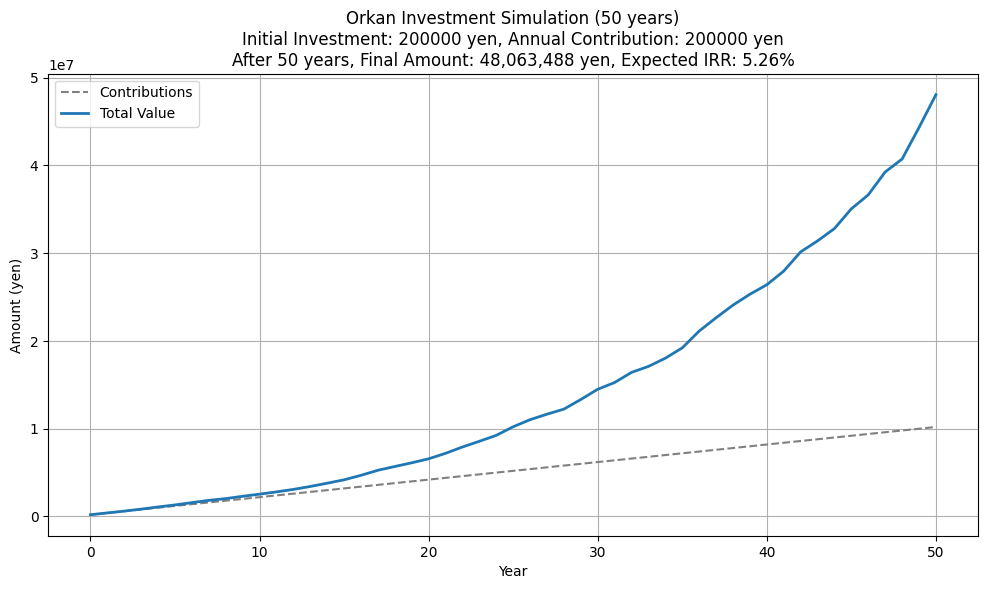

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set font for English display (default English fonts)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.unicode_minus"] = False  # Ensure minus signs are displayed correctly

def simulate_orkan(initial_investment, annual_contribution, years):
    # Generate random annual returns from a normal distribution (mean=5%, std=2%)
    annual_returns = np.random.normal(0.05, 0.02, years)
    investment_values = np.zeros(years + 1)
    investment_values[0] = initial_investment
    for year in range(1, years + 1):
        investment_values[year] = investment_values[year - 1] * (1 + annual_returns[year - 1]) + annual_contribution
    return investment_values, annual_returns

def npv(rate, cash_flows):
    """Calculate the Net Present Value (NPV) for a given discount rate and cash flows."""
    total = 0
    for t, cf in enumerate(cash_flows):
        total += cf / ((1 + rate) ** t)
    return total

def compute_irr(cash_flows, tol=1e-6, max_iter=1000):
    """Compute the Internal Rate of Return (IRR) using binary search."""
    low, high = -0.99, 1.0
    for i in range(max_iter):
        mid = (low + high) / 2
        npv_mid = npv(mid, cash_flows)
        if abs(npv_mid) < tol:
            return mid
        if npv_mid > 0:
            low = mid
        else:
            high = mid
    return mid

# Parameters
initial_investment = 200000   # Initial investment
annual_contribution = 200000  # Annual contribution
years = 50

# Run simulation
investment_values, annual_returns = simulate_orkan(initial_investment, annual_contribution, years)
final_amount = investment_values[-1]

# Define cash flows:
# t=0: - initial investment
# t=1 to t=years-1: - annual contribution
# t=years: - annual contribution + final total value (including the final year's contribution)
cash_flows = [-initial_investment] + [-annual_contribution] * (years - 1) + [-annual_contribution + final_amount]
irr = compute_irr(cash_flows)

# Compute cumulative contributions over time
contributions = np.array([initial_investment + annual_contribution * i for i in range(years + 1)])

# Print simulation results
print("----- Simulation Results -----")
print(f"Final Amount: {final_amount:,.0f} yen")
print(f"Expected IRR: {irr*100:.2f}%")
print("Annual Returns:")
print(annual_returns)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(range(years + 1), contributions, label='Contributions', linestyle='--', color='gray')
plt.plot(range(years + 1), investment_values, label='Total Value', linewidth=2)

plt.title(
    f"Orkan Investment Simulation ({years} years)\n"
    f"Initial Investment: {initial_investment} yen, Annual Contribution: {annual_contribution} yen\n"
    f"After {years} years, Final Amount: {final_amount:,.0f} yen, Expected IRR: {irr*100:.2f}%"
)
plt.xlabel('Year')
plt.ylabel('Amount (yen)')
plt.legend()
plt.grid(True)
plt.show()

----- Simulation Results -----
Final Amount: 39,089,573 yen
Expected IRR: 4.63%
Annual Returns:
[ 0.05056455  0.01793234  0.0408102   0.07083702  0.06949001  0.04825128
  0.04831948  0.04978657  0.07325831  0.0159276   0.0565999   0.05052302
  0.04002127  0.04844777  0.04238466  0.05758879  0.06321479  0.07864596
  0.03445056  0.042009    0.03170306  0.03166855  0.01892578  0.0245986
  0.08408203  0.04208757  0.07198668  0.03222214  0.05258923  0.06728378
  0.03576717  0.03708017  0.06218138  0.06811724  0.04675172  0.06805858
  0.05988172  0.08277387  0.03676199 -0.00375993  0.02741769  0.01955606
  0.05028049  0.03848409  0.03018399  0.07285395  0.01744883  0.0746472
  0.03357053  0.03925548]


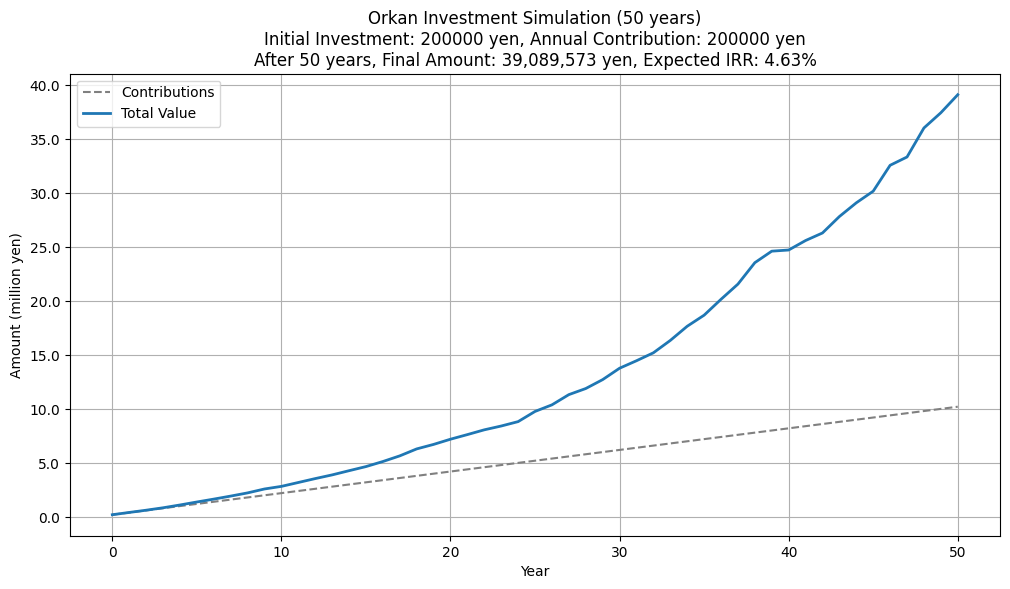

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Set font for English display (default English fonts)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.unicode_minus"] = False  # Ensure minus signs are displayed correctly

def simulate_orkan(initial_investment, annual_contribution, years):
    # Generate random annual returns from a normal distribution (mean=5%, std=2%)
    annual_returns = np.random.normal(0.05, 0.02, years)
    investment_values = np.zeros(years + 1)
    investment_values[0] = initial_investment
    for year in range(1, years + 1):
        investment_values[year] = investment_values[year - 1] * (1 + annual_returns[year - 1]) + annual_contribution
    return investment_values, annual_returns

def npv(rate, cash_flows):
    """Calculate the Net Present Value (NPV) for a given discount rate and cash flows."""
    total = 0
    for t, cf in enumerate(cash_flows):
        total += cf / ((1 + rate) ** t)
    return total

def compute_irr(cash_flows, tol=1e-6, max_iter=1000):
    """Compute the Internal Rate of Return (IRR) using binary search."""
    low, high = -0.99, 1.0
    for i in range(max_iter):
        mid = (low + high) / 2
        npv_mid = npv(mid, cash_flows)
        if abs(npv_mid) < tol:
            return mid
        if npv_mid > 0:
            low = mid
        else:
            high = mid
    return mid

# Parameters
initial_investment = 200000   # Initial investment (yen)
annual_contribution = 200000  # Annual contribution (yen)
years = 50

# Run simulation
investment_values, annual_returns = simulate_orkan(initial_investment, annual_contribution, years)
final_amount = investment_values[-1]

# Define cash flows:
# t=0: -initial investment
# t=1 to t=years-1: -annual contribution
# t=years: -annual contribution + final total value (including the final year's contribution)
cash_flows = [-initial_investment] + [-annual_contribution] * (years - 1) + [-annual_contribution + final_amount]
irr = compute_irr(cash_flows)

# Compute cumulative contributions over time
contributions = np.array([initial_investment + annual_contribution * i for i in range(years + 1)])

# Print simulation results
print("----- Simulation Results -----")
print(f"Final Amount: {final_amount:,.0f} yen")
print(f"Expected IRR: {irr*100:.2f}%")
print("Annual Returns:")
print(annual_returns)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(range(years + 1), contributions, label='Contributions', linestyle='--', color='gray')
plt.plot(range(years + 1), investment_values, label='Total Value', linewidth=2)

plt.title(
    f"Orkan Investment Simulation ({years} years)\n"
    f"Initial Investment: {initial_investment} yen, Annual Contribution: {annual_contribution} yen\n"
    f"After {years} years, Final Amount: {final_amount:,.0f} yen, Expected IRR: {irr*100:.2f}%"
)
plt.xlabel('Year')
plt.ylabel('Amount (million yen)')

# Format y-axis ticks to show values in millions of yen
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))

plt.legend()
plt.grid(True)
plt.show()